<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Settings" data-toc-modified-id="Settings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Settings</a></span></li><li><span><a href="#Fill-aggregated-data" data-toc-modified-id="Fill-aggregated-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fill aggregated data</a></span></li><li><span><a href="#Heatmaps" data-toc-modified-id="Heatmaps-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Heatmaps</a></span></li></ul></div>

In [2]:
import os
import json
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from utils import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Matplotlib 
plt.rc('font', size=18)  

### Settings

In [3]:
# From benchmarking.py >>>>
# VGG16 layers [7, 11, 15]
# DenseNet121 layers [None, 53, 80, 113]
# ResNet layers [None, 15, 30, 45]
first_trained_layer = [None, 7, 11, 15]
image_shape_resized = [(112, 112)]
patch_size = [(1000, 1000)]
learning_rate = [1e-3, 1e-4, 1e-5]
optimizers = ["Adam"]

hyperparams_list = [first_trained_layer,
                        image_shape_resized,
                        patch_size,
                        learning_rate,
                        optimizers]
hyperparams_list = list(itertools.product(*hyperparams_list))
# <<<<

ROOT_PATH = "/space/ponzio/Morpheme_v2/results_classification/"
EXPERIMENT = "08_04_2021-17_14_16_Baseline_NotCancerAllTumors_benchmarking"
Y_COL = "NotCancerAllTumors"
ROOT_PATH_EXPERIMENT = os.path.join(ROOT_PATH, EXPERIMENT)
PLOT_CFM = True
PARAM_ROW = "learning_rate"
PARAM_COL = "first_trained_layer"
PARAM_ROW_LIST = learning_rate
PARAM_COL_LIST = first_trained_layer

# One param is foxed to have 2D heatmap
PARAM_FIXED = "optimizer"
PARAM_FIXED_VALUE = "Adam"
n_folds = len([d for d in os.listdir(ROOT_PATH_EXPERIMENT) if os.path.isdir(os.path.join(ROOT_PATH_EXPERIMENT, d))])
print("Found {} folds in {}".format(n_folds, 
                                    ROOT_PATH_EXPERIMENT))
# Colormap for evaluation 
hyperparams_grids = [np.zeros((len(PARAM_ROW_LIST), 
                               len(PARAM_COL_LIST))),
                     np.zeros((len(PARAM_ROW_LIST), 
                               len(PARAM_COL_LIST)))]

Found 1 folds in /space/ponzio/Morpheme_v2/results_classification/08_04_2021-17_14_16_Baseline_NotCancerAllTumors_benchmarking


### Fill aggregated data

In [4]:
dirpath_experiments = list()
filename_experiments = list()
for fold in os.listdir(ROOT_PATH_EXPERIMENT):
    dirpath_fold = os.path.join(ROOT_PATH_EXPERIMENT, fold)
    if os.path.isdir(dirpath_fold):
        for model in os.listdir(dirpath_fold):
            filename_experiments.append(model)
            dirpath_model = os.path.join(dirpath_fold, model)
            dirpath_experiments.append(dirpath_model)
filename_experiments = list(set(filename_experiments))  # Univocal filename of experiments
# Each experiment's dir is a dict key.
# Each value for such dict is an other dict with keys "y_test", "preds", "categorical_sorted_labels", which are lists.
# Such lists are initialized in the following loop.
dict_experiments = dict()
for experiment in (filename_experiments):
    dict_experiments[experiment] = dict()
    dict_experiments[experiment]["y_test"] = list()
    dict_experiments[experiment]["preds"] = list()
    dict_experiments[experiment]["labels_categorical"] = list()
    dict_experiments[experiment]["path"] = None
    dict_experiments[experiment]["params"] = None
# <<<<
if len(dict_experiments) != len(hyperparams_list):
    raise ValueError("Check list of hyperparameters.")
for dirpath in dirpath_experiments:
    dirname = os.path.basename(dirpath)
    # Load predictions
    file_path = os.path.join(dirpath, "predictions.npy")
    dict_experiments[dirname]["preds"] += list(np.load(file_path))
    # Load y_test
    file_path = os.path.join(dirpath, "y_test.npy")
    dict_experiments[dirname]["y_test"] += list(np.load(file_path))
    # Load parameters json
    file_path = os.path.join(dirpath, "parameters.json")
    with open(file_path) as handle:
        params = json.loads(handle.read())
        dict_experiments[dirname]["params"] = params
    # Get categorical labels
    file_path = params["filepath_dataframe_test"]
    # Remove possible NaN
    df_test = pd.read_csv(file_path)[Y_COL].dropna()
    dict_experiments[dirname]["labels_categorical"] = sorted(list(set(df_test)))
    # Save path
    dict_experiments[dirname]["path"] = dirpath

### Heatmaps

Computing aggragate crossvalidation evaluation metrics
Processing FTL7_IS(112, 112)_PS(1000, 1000)_LR0.001_OPTAdam
# of testing data: 10428
Mean accuracy: 0.78 +- 0.05
Processing FTL7_IS(112, 112)_PS(1000, 1000)_LR1e-05_OPTAdam
# of testing data: 10428
Mean accuracy: 0.80 +- 0.03
Processing FTL15_IS(112, 112)_PS(1000, 1000)_LR1e-05_OPTAdam
# of testing data: 10428
Mean accuracy: 0.78 +- 0.04
Processing FTL-1_IS(112, 112)_PS(1000, 1000)_LR0.0001_OPTAdam
# of testing data: 10428
Mean accuracy: 0.70 +- 0.04
Processing FTL-1_IS(112, 112)_PS(1000, 1000)_LR1e-05_OPTAdam
# of testing data: 10428
Mean accuracy: 0.49 +- 0.07
Processing FTL-1_IS(112, 112)_PS(1000, 1000)_LR0.001_OPTAdam
# of testing data: 10428
Mean accuracy: 0.20 +- 0.08
Processing FTL15_IS(112, 112)_PS(1000, 1000)_LR0.0001_OPTAdam
# of testing data: 10428
Mean accuracy: 0.81 +- 0.02
Processing FTL7_IS(112, 112)_PS(1000, 1000)_LR0.0001_OPTAdam
# of testing data: 10428
Mean accuracy: 0.76 +- 0.05
Processing FTL11_IS(112, 112)_PS(

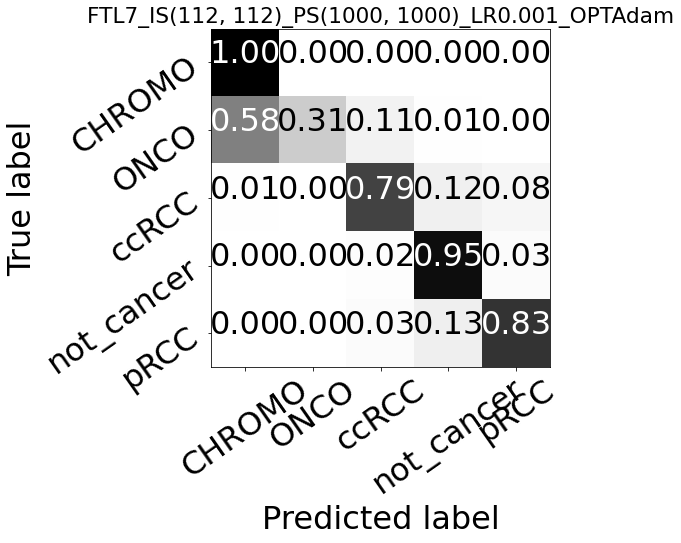

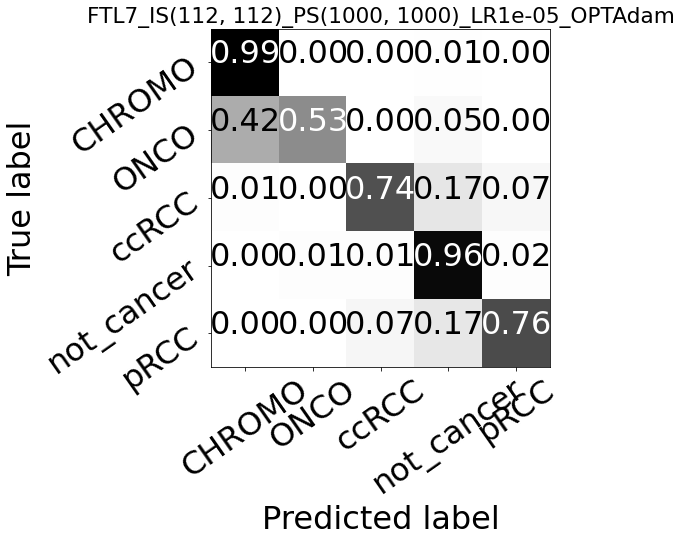

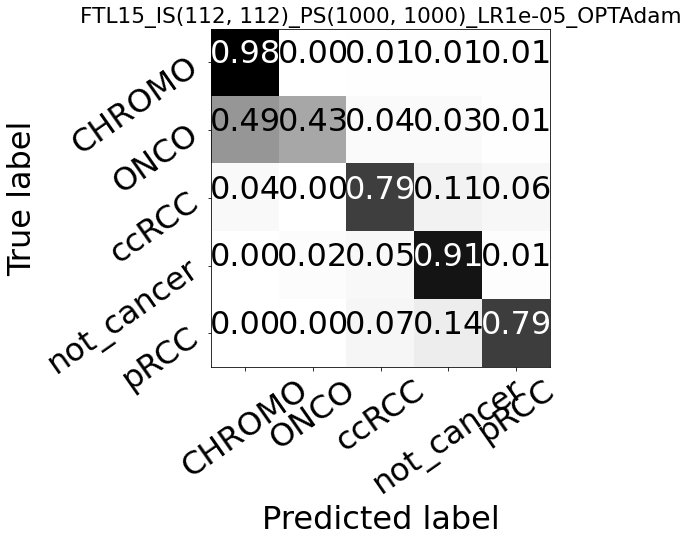

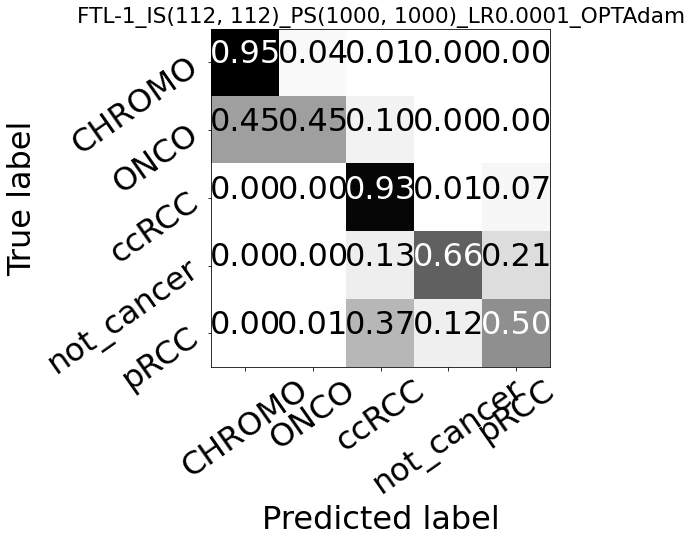

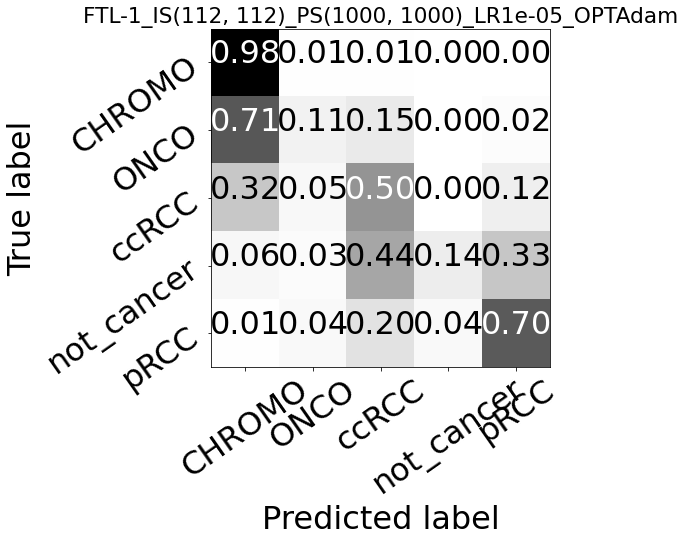

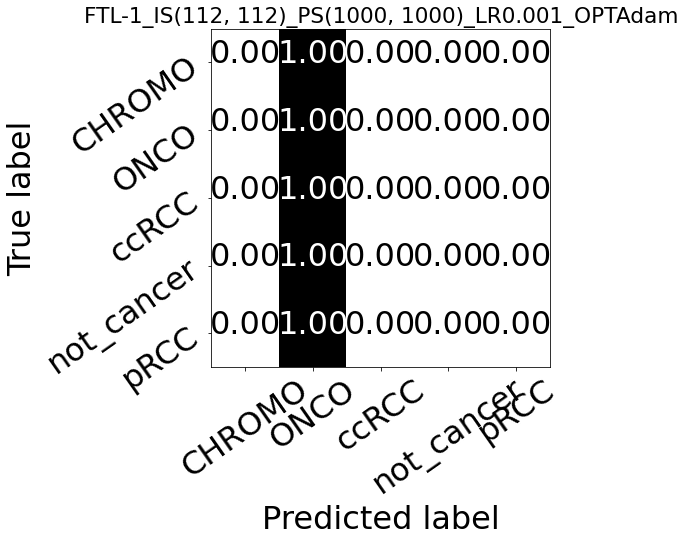

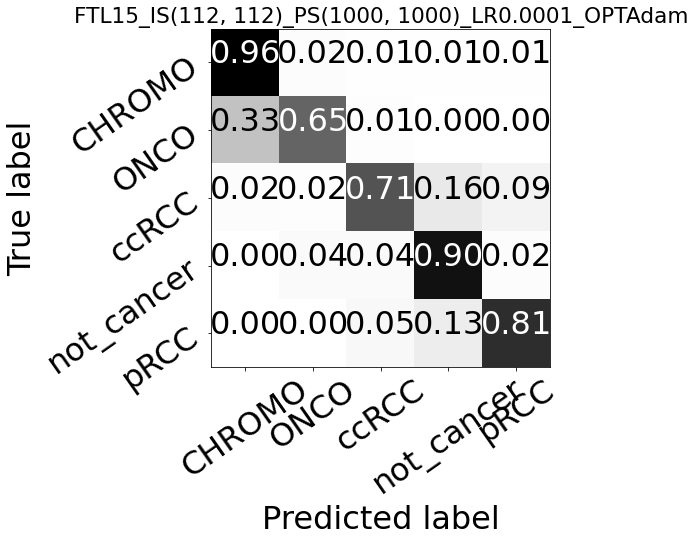

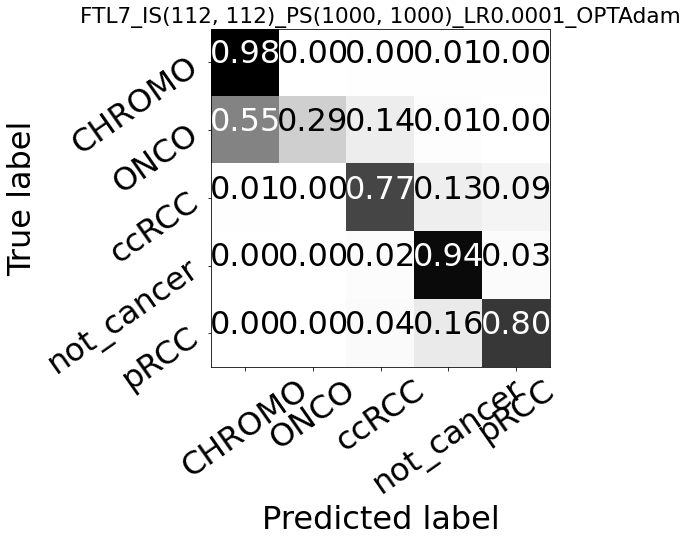

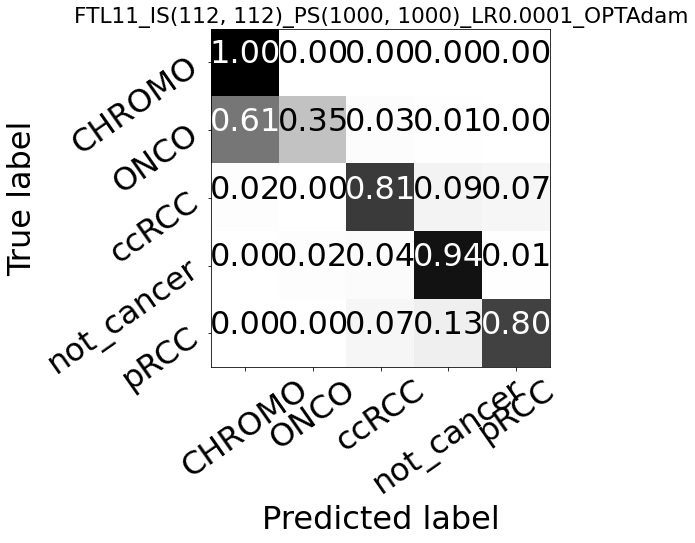

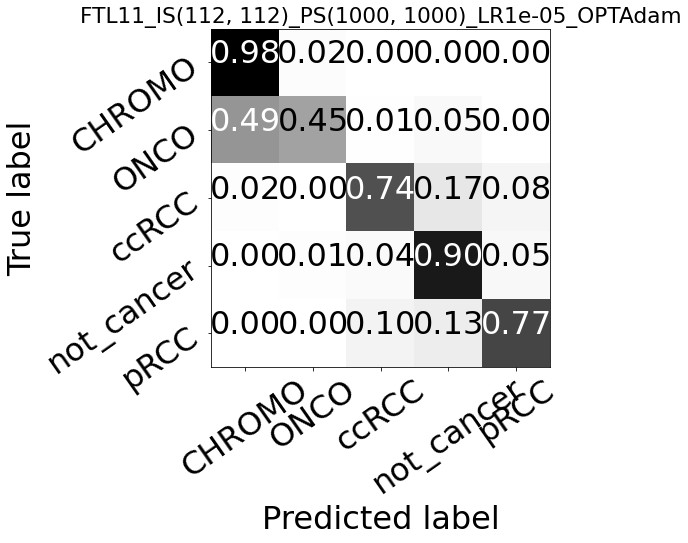

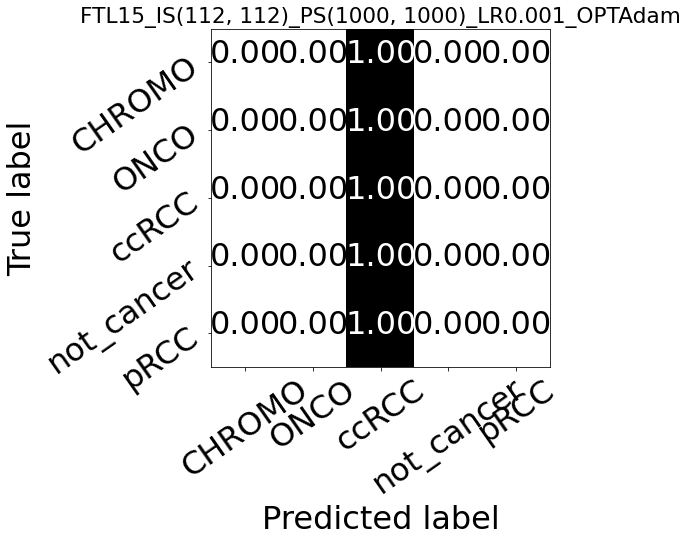

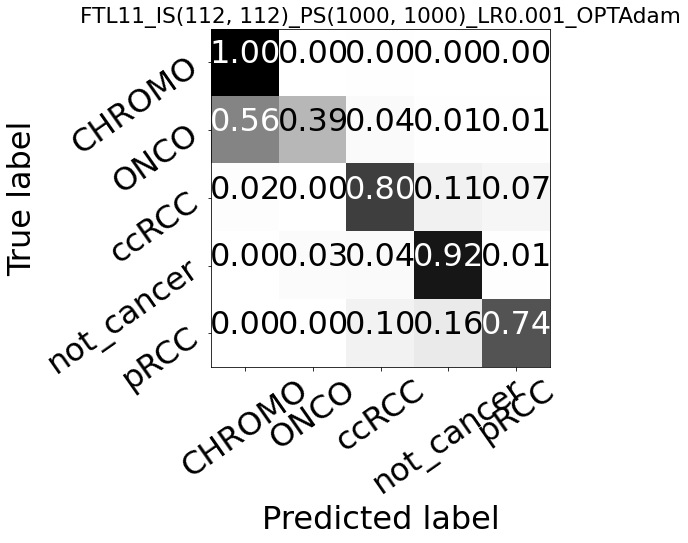

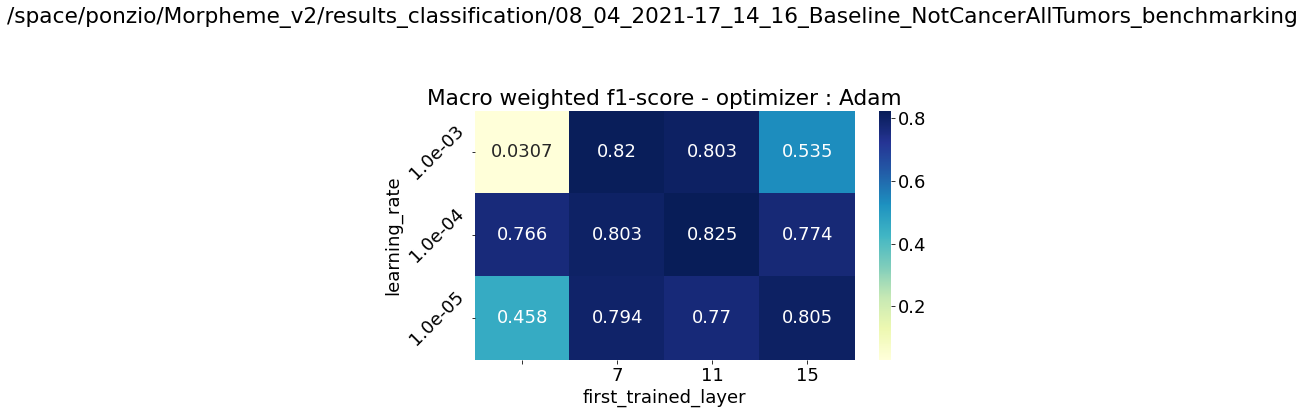

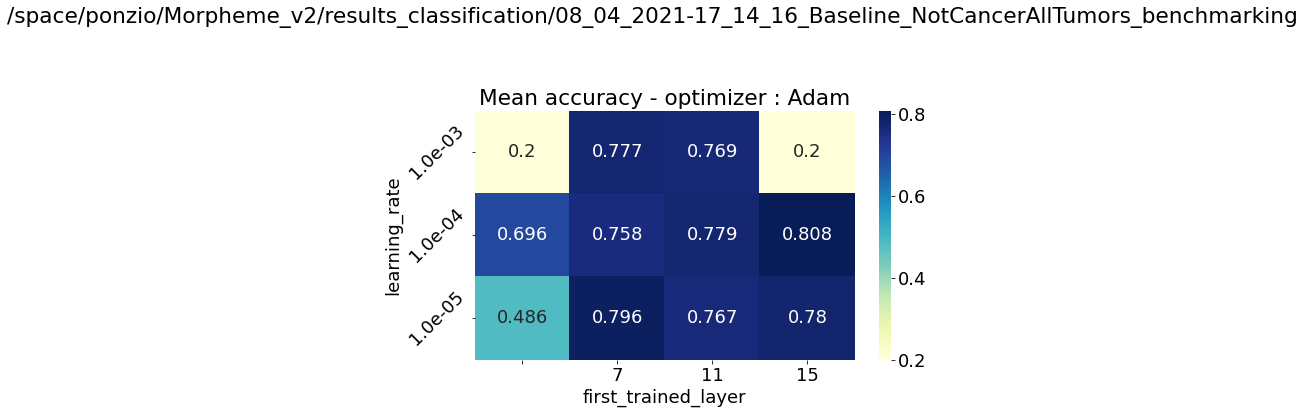

In [5]:
### Aggregated f1 score
print("Computing aggragate crossvalidation evaluation metrics")
for experiment, _dict in dict_experiments.items():
    print("Processing {}".format(experiment))
    print("# of testing data: {}".format(len(_dict["y_test"])))
    cm = confusion_matrix(_dict["y_test"], np.argmax(_dict["preds"], axis=1))
    true_pos = np.diag(cm)
    mean_accuracy = sum(true_pos/np.sum(cm, axis=1))/len(true_pos)
    std_accuracy = np.std(true_pos/np.sum(cm, axis=1))/len(true_pos)
    print("Mean accuracy: {:.2f} +- {:.2f}".format(mean_accuracy, std_accuracy))
    f1 = f1_score(_dict["y_test"], np.argmax(_dict["preds"], axis=1), average="micro")
    # Popolate hyperparams matrix if _dict["params"][PARAM_FIXED] == PARAM_FIXED_VALUE: (one param is freed for 2D plot)
    if _dict["params"][PARAM_FIXED] == PARAM_FIXED_VALUE:
        param_row = _dict["params"][PARAM_ROW]
        param_col = _dict["params"][PARAM_COL]
        hyperparams_grids[0][PARAM_ROW_LIST.index(param_row),
                             PARAM_COL_LIST.index(param_col)] = f1
        hyperparams_grids[1][PARAM_ROW_LIST.index(param_row),
                             PARAM_COL_LIST.index(param_col)] = mean_accuracy
    else:
        print("SKIPPED!")
    # Aggregated confusion matrix
    if PLOT_CFM:
        file_path = os.path.join(ROOT_PATH_EXPERIMENT,
                                 "{}_aggregated_confusion_matrix.png".format(experiment))
        _, ax = plt.subplots(1, 1, figsize=(8, 8))
        plot_confusion_matrix(_dict["y_test"],
                              np.argmax(_dict["preds"], axis=1),
                              ax,
                              _dict["labels_categorical"],
                              set_ticks=True,
                              filepath_plot=file_path,
                              cm_computed_yet=None,
                              font_size=32,
                              title=experiment,
                              tight_layout=True)
    
# Plots 
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(hyperparams_grids[0], ax=ax, annot=True, fmt='.3g', cmap="YlGnBu");
ax.set_xlabel(PARAM_COL)
if PARAM_COL == "fixed_trained_layer":
    ax.set_xticklabels([p if p >= 0 else "from scratch" for p in PARAM_COL_LIST])
else:
    ax.set_xticklabels([p for p in PARAM_COL_LIST])
ax.set_ylabel(PARAM_ROW)
if PARAM_ROW == "learning_rate":
    ax.set_yticklabels(['{:1.1e}'.format(p) for p in PARAM_ROW_LIST], rotation=45, verticalalignment='center');
else:
    ax.set_yticklabels([p for p in PARAM_ROW_LIST])
# Plot heatmaps
title = "Macro weighted f1-score - {} : {}".format(PARAM_FIXED, PARAM_FIXED_VALUE)
ax.set_title(title)
file_path = os.path.join(ROOT_PATH_EXPERIMENT, title + ".png")
fig.suptitle(ROOT_PATH_EXPERIMENT, y=1)
plt.tight_layout(rect=[0, 0.03, 1.05, 0.95])
fig.savefig(file_path)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(hyperparams_grids[1], ax=ax, annot=True, fmt='.3g', cmap="YlGnBu");
ax.set_xlabel(PARAM_COL)
if PARAM_COL == "fixed_trained_layer":
    ax.set_xticklabels([p if p >= 0 else "from scratch" for p in PARAM_COL_LIST])
else:
    ax.set_xticklabels([p for p in PARAM_COL_LIST])
ax.set_ylabel(PARAM_ROW)
if PARAM_ROW == "learning_rate":
    ax.set_yticklabels(['{:1.1e}'.format(p) for p in PARAM_ROW_LIST], rotation=45, verticalalignment='center');
else:
    ax.set_yticklabels([p for p in PARAM_ROW_LIST])

title = "Mean accuracy - {} : {}".format(PARAM_FIXED, PARAM_FIXED_VALUE)
ax.set_title(title)
file_path = os.path.join(ROOT_PATH_EXPERIMENT, title + ".png")
fig.suptitle(ROOT_PATH_EXPERIMENT, y=1)
plt.tight_layout(rect=[0, 0.03, 1.05, 0.95])
fig.savefig(file_path)